# Four Factors Prediction Model

Four Factors are the box score derived metrics that correlate most closely with winning basketball games. These factors also identify a team’s strategic strengths and weaknesses. These can be calculated for the winning and loosing teams.

1) Team’s Own Effective Field Goal Percentage
    1) Effective Field Goal Percentage measures the shooting factor is measured using
    2) Effective Field Goal Percentage = (Field Goals Made) + (0.5 * 3-Pointer Field Goals Made) / (Field Goal Attempts)
    3) Winning Team: WFGM + (0.5 * WFGM3) / WFGA
    4) Losing Team: LFGM + (0.5 * LFGM3) / LFGA
2) Team’s Own Turnover Percentage
    1) Turnover Percentage is the percentage of a team’s or possessions that end in a turnover. Calculating the number of turnovers a player will make in 100 possessions makes itself ‘tempo-free’
    2) Turnover Percentage = Turnovers / (Field Goal Attempts + (0.44 * Free Throw Attempts) + Turnovers)
    3) Winning Team: WTO / (WFGA + (0.44 * WFTA) + WTO)
    4) Losing Team: LTO / (LFGA + (0.44 * LFTA) + LTO)
3) Team’s Own Offensive Rebound Percentage
    1) Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a team grabbed.
    2) Offensive Rebounding Percentage = (Offensive Rebounds) / (Offensive Rebounds + Opponent’s Defensive Rebounds)
    3) Winning Team: WOR / WOR + LDR
    4) Losing Team: LOR / LOR + WDR
    5) For the Losing team with respect to the winning teams needed metric, we calculate Defensive Rebound: WDR / (LOR + WDR). As opposed to LOR / LOR + WDR.
4) Team’s Own Free Throw Rate
    1) The free throw factor is a measure of both how often a team gets to the line and how often they make them.
    2)Free Throw Rate = Free Throws Made / Field Goals Attempted
    3) Winning Team: WFTM / WFGA
    4) Losing Team: LFTM / LFGA
    
While these are the four essential factors that decide to win and to lose in the NBA, the factors do not carry equal weight. Dean Oliver (American statistician and assistant coach for the NBA's Washington Wizards) placed a certain set of weights on each of the four categories to ascertain value of each factor in regards to a win. 

1. Shooting (40%)
2. Turnovers (25%)
3. Rebounding (20%)
4. Free Throws (15%)

- https://www.nbastuffer.com/analytics101/four-factors/
- https://www.basketball-reference.com/about/factors.html
- https://squared2020.com/2017/09/05/introduction-to-olivers-four-factors/

In [19]:
import pandas as pd
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import matplotlib.pyplot as plt

In [2]:
# Load Tournament results and filter to year > 2008 (oldest moneyline data)
box_scores_df = pd.read_csv("../data//Kaggle-Data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv")
box_scores_df = box_scores_df[box_scores_df['Season'] >= 2008]

moneyline_df = pd.read_csv("../data/Pre-Processed-Data/CleanedMoneylineData.csv",index_col=0)

In [3]:
box_scores_df = box_scores_df[["Season", "DayNum", "WTeamID", "LTeamID", "WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"]]

In [4]:
winner_moneylines = pd.merge(box_scores_df, moneyline_df, how='left', 
                             left_on=['Season','DayNum','WTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","Moneyline", "WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"]]

winner_moneylines.rename(columns = {"Moneyline": "WMoneyline"}, inplace = True)

In [5]:
tournament_moneyline_df = pd.merge(winner_moneylines, moneyline_df, how='left', 
                             left_on=['Season','DayNum','LTeamID'], 
                             right_on = ['Season','DayNum','TeamID'])[["Season", "DayNum", "WTeamID", "LTeamID","WMoneyline","Moneyline", "WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"]]

tournament_moneyline_df.rename(columns = {"Moneyline": "LMoneyline"}, inplace = True)

tournament_moneyline_df.head()

,Season,DayNum,WTeamID,LTeamID,WMoneyline,LMoneyline,WFGM,WFGA,WFGM3,WFTM,...,WDR,WTO,LFGM,LFGA,LFGM3,LFTM,LFTA,LOR,LDR,LTO
0,2008,134,1291,1164,-375.0,315.0,19,55,5,26,...,28,11,25,57,4,6,13,8,26,11
1,2008,136,1181,1125,-4500.0,2250.0,25,58,6,15,...,27,15,26,59,8,10,15,9,24,14
2,2008,136,1242,1340,-5000.0,2500.0,33,61,12,7,...,23,11,21,55,9,10,14,13,18,16
3,2008,136,1243,1425,140.0,-160.0,29,60,7,15,...,23,13,21,50,6,19,27,9,18,11
4,2008,136,1266,1246,-275.0,235.0,23,52,5,23,...,19,7,23,48,8,12,17,9,17,12


In [6]:
tournament_moneyline_df.isna().sum()

Season        0
DayNum        0
WTeamID       0
LTeamID       0
WMoneyline    0
LMoneyline    3
WFGM          0
WFGA          0
WFGM3         0
WFTM          0
WFTA          0
WOR           0
WDR           0
WTO           0
LFGM          0
LFGA          0
LFGM3         0
LFTM          0
LFTA          0
LOR           0
LDR           0
LTO           0
dtype: int64

In [7]:
# For now, drop NAs
tournament_moneyline_df = tournament_moneyline_df.dropna()

## Compute the factors/attributes for each tournament

In [8]:
# Effective Field Goal Percentage
# Winning Team: WFGM + (0.5 * WFGM3) / WFGA
tournament_moneyline_df['WEFGP'] = tournament_moneyline_df.apply(lambda row: (row.WFGM + (0.5 * row.WFGM3))/(row.WFGA), axis=1)
# Losing Team: LFGM + (0.5 * LFGM3) / LFGA
tournament_moneyline_df['LEFGP'] = tournament_moneyline_df.apply(lambda row: (row.LFGM + (0.5 * row.LFGM3))/(row.LFGA), axis=1)

#Turnover Percentage
# Winning Team: WTO / (WFGA + (0.44 * WFTA) + WTO)
tournament_moneyline_df['WTP'] = tournament_moneyline_df.apply(lambda row: (row.WTO)/(row.WFGA + (0.44 * row.WFTA) + row.WTO), axis=1)
# Losing Team: LTO / (LFGA + (0.44 * LFTA) + LTO)
tournament_moneyline_df['LTP'] = tournament_moneyline_df.apply(lambda row: (row.LTO)/(row.LFGA + (0.44 * row.LFTA) + row.LTO), axis=1)

# Offensive Rebound Percentage
# Winning Team: WOR / WOR + LDR
tournament_moneyline_df['WORP'] = tournament_moneyline_df.apply(lambda row: (row.WOR)/(row.WOR + row.LDR), axis=1)
#Losing Team: LOR / LOR + WDR
tournament_moneyline_df['LORP'] = tournament_moneyline_df.apply(lambda row: (row.LOR)/(row.LOR + row.WDR), axis=1)

#Winning Team Defensive Rebound: WDR / (LOR + WDR)
#tournament_moneyline_df['WDRP'] = tournament_moneyline_df.apply(lambda row: (row.WDR)/(row.LOR + row.WDR), axis=1)
#Losing Team Defensive Rebound: LDR / (WOR + LDR)
#tournament_moneyline_df['LDRP'] = tournament_moneyline_df.apply(lambda row: (row.LDR)/(row.WOR + row.LDR), axis=1)

# Free Throw Rate
# Winning Team: WFTM / WFGA
tournament_moneyline_df['WFTR'] = tournament_moneyline_df.apply(lambda row: (row.WFTM)/(row.WFGA), axis=1)
# Losing Team: LFTM / LFGA
tournament_moneyline_df['LFTR'] = tournament_moneyline_df.apply(lambda row: (row.LFTM)/(row.LFGA), axis=1)

In [9]:
factors_tournament_moneyline_df = tournament_moneyline_df.drop(["WFGM", "WFGA", "WFGM3", "WFTM", "WFTA", "WOR", "WDR", "WTO", "LFGM", "LFGA", "LFGM3", "LFTM", "LFTA", "LOR", "LDR", "LTO"], axis=1)

In [10]:
factors_tournament_moneyline_df.head()

,Season,DayNum,WTeamID,LTeamID,WMoneyline,LMoneyline,WEFGP,LEFGP,WTP,LTP,WORP,LORP,WFTR,LFTR
0,2008,134,1291,1164,-375.0,315.0,0.390909,0.473684,0.137363,0.149213,0.333333,0.222222,0.472727,0.105263
1,2008,136,1181,1125,-4500.0,2250.0,0.482759,0.508475,0.182393,0.175879,0.351351,0.250000,0.258621,0.169492
2,2008,136,1242,1340,-5000.0,2500.0,0.639344,0.463636,0.139949,0.207361,0.454545,0.361111,0.114754,0.181818
3,2008,136,1243,1425,140.0,-160.0,0.541667,0.480000,0.153955,0.150933,0.538462,0.281250,0.250000,0.380000
4,2008,136,1266,1246,-275.0,235.0,0.490385,0.562500,0.097547,0.177830,0.468750,0.321429,0.442308,0.250000


## Data Visualization

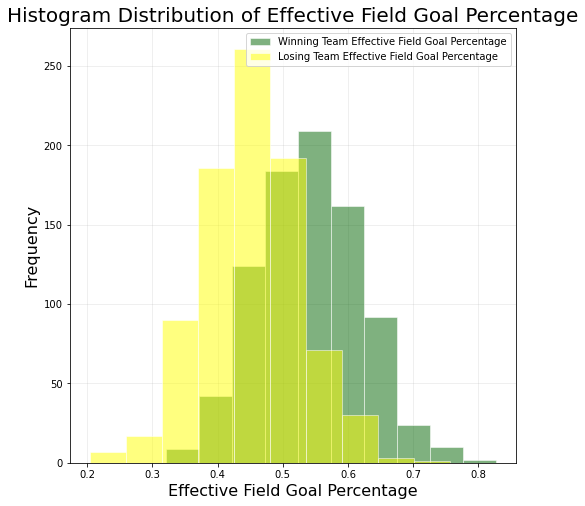

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
factors_tournament_moneyline_df.hist(column='WEFGP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Effective Field Goal Percentage")
factors_tournament_moneyline_df.hist(column='LEFGP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Effective Field Goal Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Effective Field Goal Percentage", fontsize=20)
ax.set_xlabel("Effective Field Goal Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

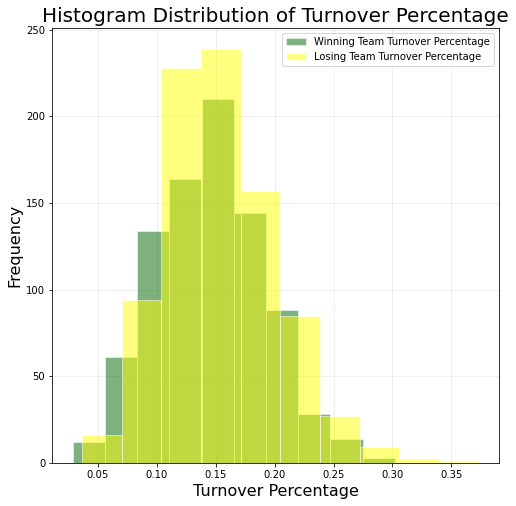

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
factors_tournament_moneyline_df.hist(column='WTP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Turnover Percentage")
factors_tournament_moneyline_df.hist(column='LTP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Turnover Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Turnover Percentage", fontsize=20)
ax.set_xlabel("Turnover Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

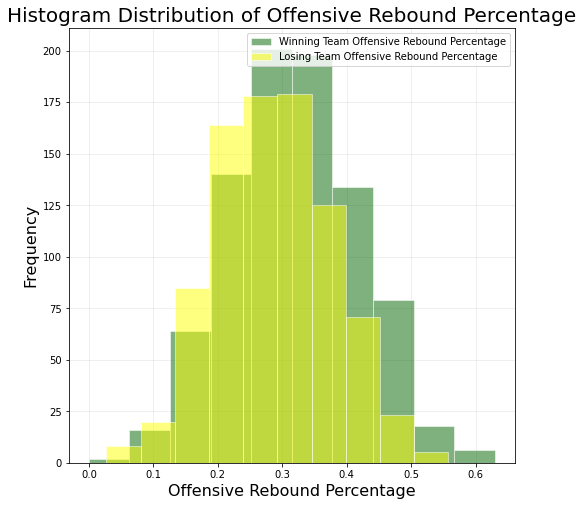

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
factors_tournament_moneyline_df.hist(column='WORP', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Offensive Rebound Percentage")
factors_tournament_moneyline_df.hist(column='LORP', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Offensive Rebound Percentage")

# Add titles and labels 
ax.set_title("Histogram Distribution of Offensive Rebound Percentage", fontsize=20)
ax.set_xlabel("Offensive Rebound Percentage", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

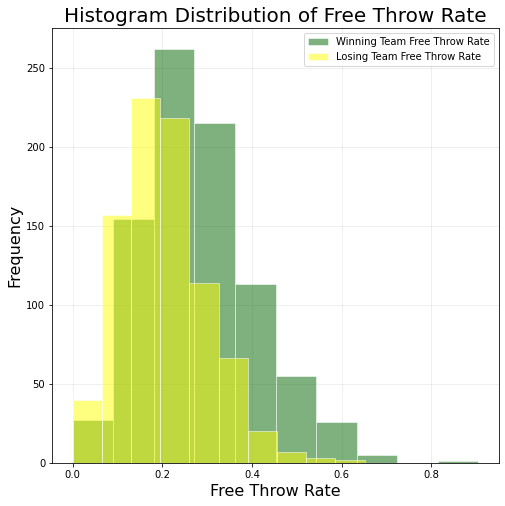

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
factors_tournament_moneyline_df.hist(column='WFTR', ax=ax,facecolor="darkgreen", alpha = 0.5, edgecolor="white", label = "Winning Team Free Throw Rate")
factors_tournament_moneyline_df.hist(column='LFTR', ax=ax,facecolor="yellow", alpha = 0.5, edgecolor="white", label = "Losing Team Free Throw Rate")

# Add titles and labels 
ax.set_title("Histogram Distribution of Free Throw Rate", fontsize=20)
ax.set_xlabel("Free Throw Rate", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

## Determining probability of win for teams using the given distribution

In [11]:
tournament_probability_df = factors_tournament_moneyline_df.drop(["WEFGP", "LEFGP", "WTP", "LTP", "WORP", "LORP", "WFTR", "LFTR"], axis=1)

In [12]:
tournament_probability_df['W4_Team_Win'] = factors_tournament_moneyline_df.apply(lambda row: (0.4 * row.WEFGP) - (0.25 * row.WTP) + (0.2 * row.WORP) + (0.15 * row.WFTR), axis=1)

In [13]:
tournament_probability_df['L4_Team_Win'] = factors_tournament_moneyline_df.apply(lambda row: (0.4 * row.LEFGP) - (0.25 * row.LTP) + (0.2 * row.LORP) + (0.15 * row.LFTR), axis=1)

In [14]:
tournament_probability_df['Difference'] = tournament_probability_df.apply(lambda row: (row.W4_Team_Win)-(row.L4_Team_Win), axis=1)

In [15]:
tournament_probability_df.head()

,Season,DayNum,WTeamID,LTeamID,WMoneyline,LMoneyline,W4_Team_Win,L4_Team_Win,Difference
0,2008,134,1291,1164,-375.0,315.0,0.259599,0.212404,0.047194
1,2008,136,1181,1125,-4500.0,2250.0,0.256569,0.234844,0.021725
2,2008,136,1242,1340,-5000.0,2500.0,0.328873,0.233109,0.095763
3,2008,136,1243,1425,140.0,-160.0,0.323370,0.267517,0.055853
4,2008,136,1266,1246,-275.0,235.0,0.331863,0.282328,0.049535


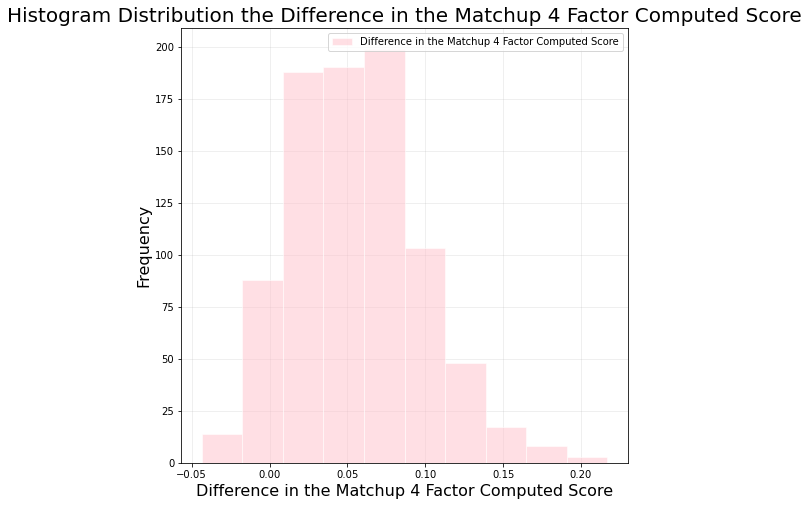

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
tournament_probability_df.hist(column='Difference', ax=ax,facecolor="pink", alpha = 0.5, edgecolor="white", label = "Difference in the Matchup 4 Factor Computed Score")


# Add titles and labels 
ax.set_title("Histogram Distribution the Difference in the Matchup 4 Factor Computed Score", fontsize=20)
ax.set_xlabel("Difference in the Matchup 4 Factor Computed Score", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

## Pseudocode for determining bets:

Alpha 0.1

if Difference >=0.1:
    bet on winning team
if Difference <-0.1:
    bet on losing team
else:
    do not bet

# Next steps:
- determine bets
- average the W_4/L_4 team metrics per team id for an average metric of the teams performace
- then you can use these weights to determien bets again (using pseudocode) in matchups 